In [1]:
!unzip /content/CEAS_08.csv.zip

Archive:  /content/CEAS_08.csv.zip
  inflating: CEAS_08.csv             


In [2]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('/content/CEAS_08.csv')

In [4]:
# Show the first five rows
df.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


# Data Preprocessing

In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [6]:
# Shape of the dataset
df.shape

(39154, 7)

In [7]:
# Null values
df.isnull().sum()

,0
sender,0
receiver,462
date,0
subject,28
body,0
label,0
urls,0


In [8]:
# Drop the rows with missing values
df = df.dropna()

In [9]:
# Shape of the dataset after removing missing values
df.shape

(38669, 7)

<Axes: >

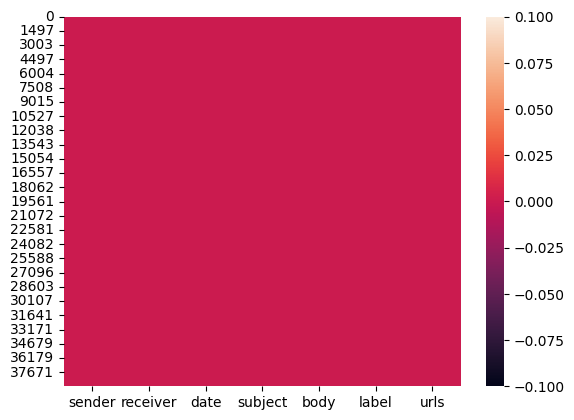

In [10]:
# To verify the null values are cleaned
sns.heatmap(df.isna())

## Data Vizualization

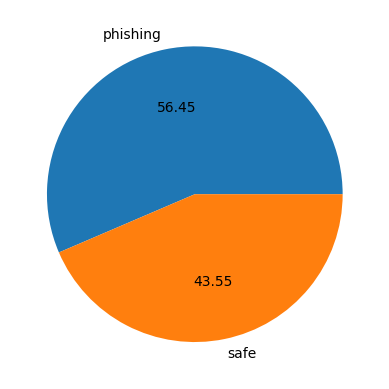

In [11]:
# Pie chart for label column
df['label'].value_counts()
plt.pie(df['label'].value_counts(), labels=['phishing','safe'],autopct="%0.2f")
plt.show()

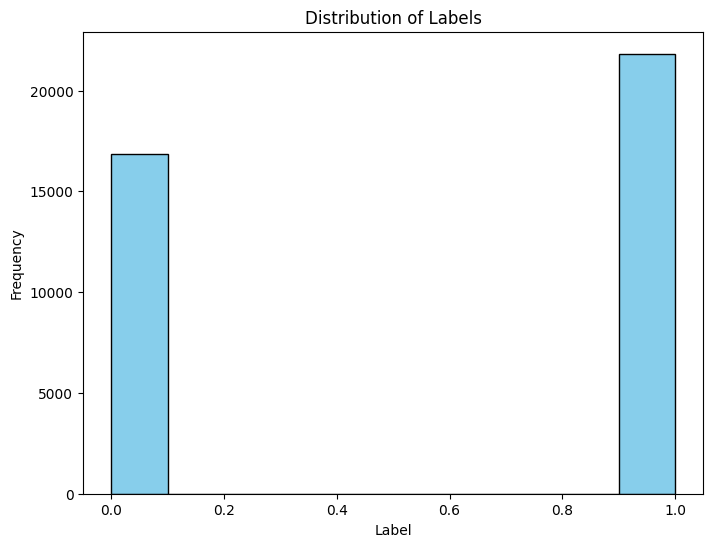

In [12]:
# Histogram for labels
plt.figure(figsize=(8, 6))
plt.hist(df['label'], color='skyblue', edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

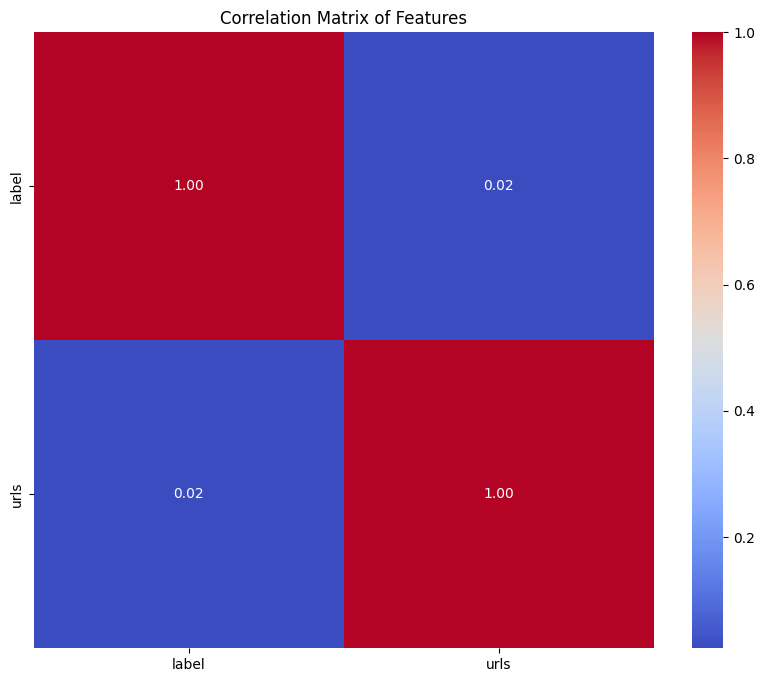

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## NLP


In [14]:
# Import necessar library for nlp features
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
# Download required NLTK data files for preprocess
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
# Initialize the stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [17]:
# Defining a function for text preprocessing
def process_text(text):
    # Convert Subject and body to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing special characters and numbers from subject and body
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]

    # Removing stop words and punctuation from subject and body
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation and word]

    # Applying Stemming to Subject and body
    tokens = [stemmer.stem(word) for word in tokens]

    # Join all tokens into a single string
    return ' '.join(tokens)

# Preprocessing to the 'subject' and 'body' columns
df['subject'] = df['subject'].fillna('').apply(process_text)
df['body'] = df['body'].fillna('').apply(process_text)

# Feature Engineering

In [18]:
# Split data into features and target
X = df[['subject', 'body']]
y = df['label']

In [19]:
# Combine 'subject' and 'body' into a single column
df['combined_text'] = df['subject'] + ' ' + df['body']

# Split data into features and target
X = df[['combined_text']]
y = df['label']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
# Fit on training data
X_train_tfidf = vectorizer.fit_transform(X_train['combined_text'])
# Transform test data
X_test_tfidf = vectorizer.transform(X_test['combined_text'])

# Model Implement

In [22]:
# Import necessary library for models implement
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GlobalMaxPooling1D

##Random forest

In [23]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test_tfidf)

In [25]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, rf_predictions)
report_rf = classification_report(y_test, rf_predictions)
confusion_rf = confusion_matrix(y_test, rf_predictions)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)
print("Confusion Matrix:\n", confusion_rf)

Accuracy: 0.9945694336695112
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3368
           1       1.00      0.99      1.00      4366

    accuracy                           0.99      7734
   macro avg       0.99      0.99      0.99      7734
weighted avg       0.99      0.99      0.99      7734

Confusion Matrix:
 [[3357   11]
 [  31 4335]]


## Logistic Regression

In [26]:
# logistic regression
lr= LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
# Predict on test data
y_pred = lr.predict(X_test_tfidf)

In [28]:
# Evaluate model
accuracy_lr = accuracy_score(y_test, y_pred)
report_lr = classification_report(y_test, y_pred)
confusion_lr = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", report_lr)
print("Confusion Matrix:\n", confusion_lr)

Accuracy: 0.9936643392810964
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3368
           1       1.00      0.99      0.99      4366

    accuracy                           0.99      7734
   macro avg       0.99      0.99      0.99      7734
weighted avg       0.99      0.99      0.99      7734

Confusion Matrix:
 [[3351   17]
 [  32 4334]]


## ANN

In [29]:
# ANN Model
ann = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
ann.fit(X_train_tfidf, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [30]:
# Predict on the test set
y_pred_ann = ann.predict(X_test_tfidf)

In [31]:
# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
report_ann = classification_report(y_test, y_pred_ann)
confusion_ann = confusion_matrix(y_test, y_pred_ann)
print("Accuracy:", accuracy_ann)
print("Classification Report:\n", report_ann)
print("Confusion Matrix:\n", confusion_ann)

Accuracy: 0.9965089216446859
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3368
           1       1.00      1.00      1.00      4366

    accuracy                           1.00      7734
   macro avg       1.00      1.00      1.00      7734
weighted avg       1.00      1.00      1.00      7734

Confusion Matrix:
 [[3360    8]
 [  19 4347]]


## CNN

In [32]:
# Tokenize the text data
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train['combined_text'])

X_train_seq = tokenizer.texts_to_sequences(X_train['combined_text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['combined_text'])

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [33]:
# Build the CNN model
cnn = Sequential()
cnn.add(Embedding(max_words, 128, input_length=max_sequence_length))
cnn.add(Conv1D(64, 5, activation='relu'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(10, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
# Train the model
cnn.fit(X_train_pad, y_train, epochs=1, batch_size=32, validation_split=0.1)

871/871 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9480 - loss: 0.1517 - val_accuracy: 0.9952 - val_loss: 0.0161


In [35]:
# Evaluate the model
loss, accuracy = cnn.evaluate(X_test_pad, y_test, verbose=0)
print("Accuracy:", accuracy)

y_pred_cnn = (cnn.predict(X_test_pad) > 0.5).astype("int32")
report_cnn = classification_report(y_test, y_pred_cnn)
confusion_cnn = confusion_matrix(y_test, y_pred_cnn)

print("Classification Report:\n", report_cnn)
print("Confusion Matrix:\n", confusion_cnn)

Accuracy: 0.9948280453681946
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3368
           1       1.00      0.99      1.00      4366

    accuracy                           0.99      7734
   macro avg       0.99      0.99      0.99      7734
weighted avg       0.99      0.99      0.99      7734

Confusion Matrix:
 [[3354   14]
 [  26 4340]]


## KNN

In [36]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [37]:
# Predict on the test set
y_pred_knn = knn.predict(X_test_tfidf)

In [38]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)
print("Confusion Matrix:\n", confusion_knn)

Accuracy: 0.8395396948538919
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77      3368
           1       0.78      1.00      0.88      4366

    accuracy                           0.84      7734
   macro avg       0.89      0.82      0.83      7734
weighted avg       0.87      0.84      0.83      7734

Confusion Matrix:
 [[2132 1236]
 [   5 4361]]


## Comparing models

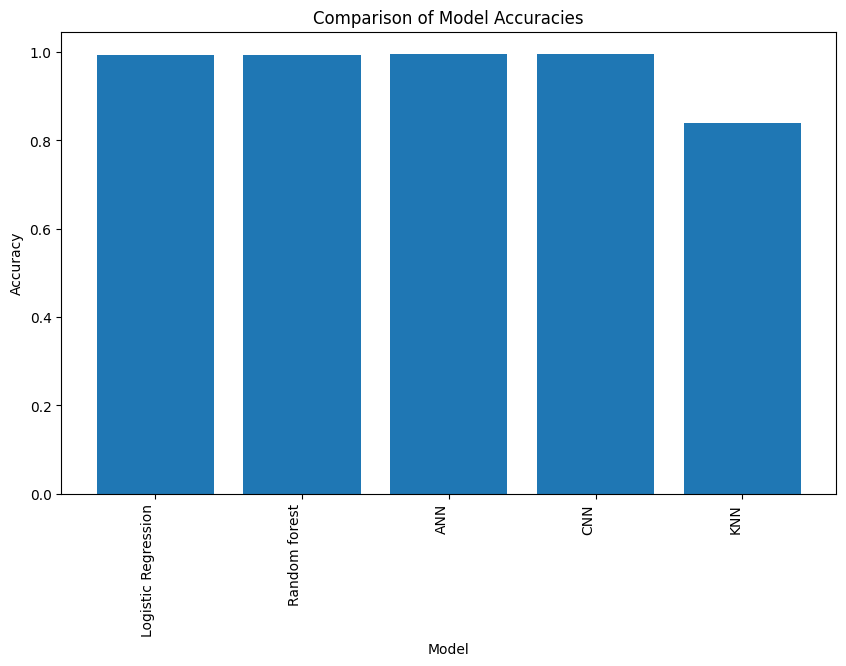

In [39]:
accuracy_scores = {
    'Logistic Regression': accuracy_lr,
    'Random forest': accuracy_rf,
    'ANN': accuracy_ann,
    'CNN': accuracy,
    'KNN': accuracy_knn
}

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=90, ha='right')
plt.show()

## Model deployement on random values

In [42]:
best_model = lr

# Model Deployment
def predict_email(subject, body, vectorizer, model):
    # Preprocess the input subject and body
    processed_subject = process_text(subject)
    processed_body = process_text(body)
    combined_text = processed_subject + ' ' + processed_body

    # Vectorize the combined text
    tfidf = vectorizer.transform([combined_text])

    # Make a prediction
    prediction = model.predict(tfidf)[0]

    return prediction

# Example usage:
subject = "Free money!!!" #@param {type: "string"}
body = "Click here to claim your prize!" #@param {type: "string"}

prediction = predict_email(subject, body, vectorizer, best_model)

print(f"The predicted label for the email is: {prediction}")


# Select 3 random data rows for demonstration
random_indices = np.random.choice(df.index, size=3, replace=False)
random_rows = df.loc[random_indices]
random_rows['combined_text'] = random_rows['subject'] + ' ' + random_rows['body']


#Predict using the trained model
predictions = best_model.predict(vectorizer.transform(random_rows['combined_text'])) # Use the best model

# Create a DataFrame with the predictions, actual labels, subject, and body
data = {'Email text': random_rows['combined_text'],
        'prediction': predictions,
        'actual_label': random_rows['label'],
        'subject': random_rows['subject'],
        'body': random_rows['body']}
results_df = pd.DataFrame(data)

# Print the DataFrame
results_df

The predicted label for the email is: 1


,Email text,prediction,actual_label,subject,body
5813,men low libido bang might renew mighti morph p...,1,1,men low libido,bang might renew mighti morph power pecker htt...
26532,men want buy rolex watch fraction price one gr...,1,1,men want buy rolex watch fraction price,one great qualiti product good custom support ...
37658,samldev one token per endpointaddress hi diffe...,0,0,samldev one token per endpointaddress,hi differ webservic trust secur token servic p...


Label
* Phishing - 1
* Safe - 0